In [1]:
import numpy as np
import psychopy
from skimage.external import tifffile
from psychopy.monitors import GammaCalculator
%matplotlib notebook
import matplotlib.pyplot as plt
import os

In [51]:
px = 512
framerate = 30.6
trial_length = 1
n_trials = 41
offset = 10
trial_frames = framerate * trial_length
lum_values = np.linspace(0, 256, n_trials)

In [35]:
folderPath = 'V:\\users\\Aaron\\170628_ScreenCalib\\'
basePath = os.path.join(folderPath, 'base6_00001.tif')
base = tifffile.imread(basePath)

In [36]:
baseAvg = base.mean(axis=(1,2))
base_median = np.median(base)
base_median

-48.0

<IPython.core.display.Javascript object>


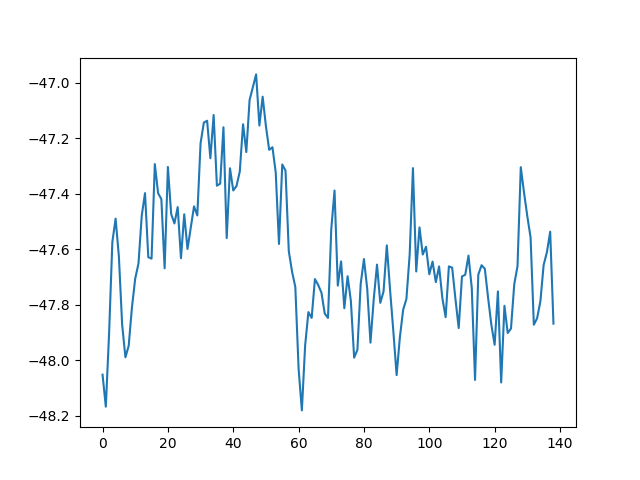

In [37]:
%matplotlib notebook
plt.plot(baseAvg)

In [38]:

calibPath = os.path.join(folderPath, 'Run6_00001.tif')
calib = tifffile.imread(calibPath)

In [39]:
calib.shape

(1369L, 512L, 512L)

In [40]:
calib_avg = calib.mean(axis=(1,2))

<IPython.core.display.Javascript object>


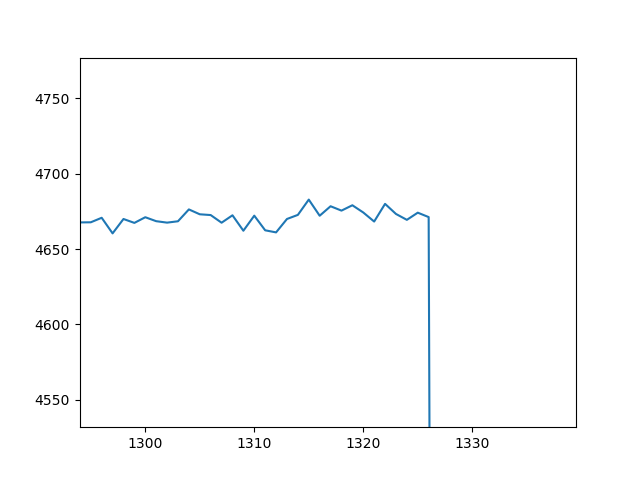

In [41]:
%matplotlib notebook
plt.plot(calib_avg)

In [42]:
calib_crop = calib_avg[62:1322]

<IPython.core.display.Javascript object>


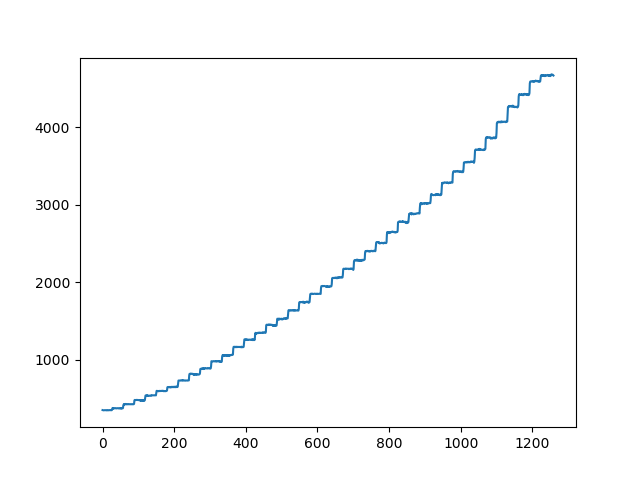

In [43]:
%matplotlib notebook
plt.plot(calib_crop)

<IPython.core.display.Javascript object>


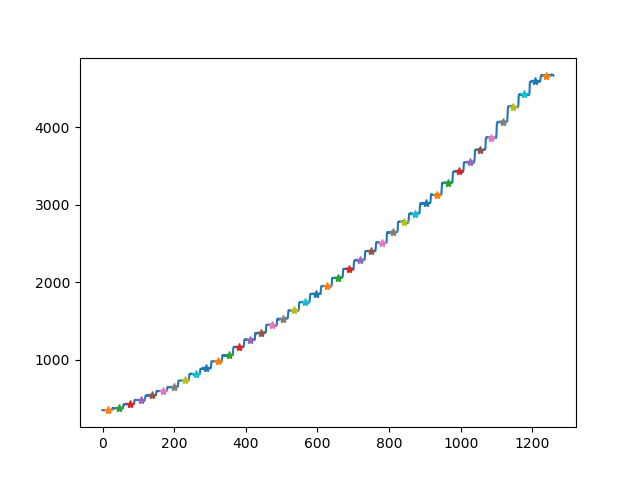

3, 28
34, 58
64, 89
95, 119
125, 150
156, 181
187, 211
217, 242
248, 272
278, 303
309, 334
340, 364
370, 395
401, 425
431, 456
462, 487
493, 517
523, 548
554, 578
584, 609
615, 640
646, 670
676, 701
707, 731
737, 762
768, 793
799, 823
829, 854
860, 884
890, 915
921, 946
952, 976
982, 1007
1013, 1037
1043, 1068
1074, 1099
1105, 1129
1135, 1160
1166, 1190
1196, 1221
1227, 1252


In [52]:
%matplotlib notebook
offset=3
#data = np.random.rand(px, px, framerate*trial_length*n_trials)
avg = np.zeros((n_trials))
plt.plot(calib_crop)
for i in range(n_trials):
    start = np.round(i * trial_frames + offset).astype(int)
    end = np.round((i + 1) * trial_frames - offset).astype(int)
    print('%d, %d' % (start, end))
    avg[i] = np.median(calib_crop[start:end])
    plt.plot((start+end) / 2, avg[i], '*')

In [53]:
avg_new = avg - base_median

avg_new

array([  399.28168106,   423.66731834,   476.17630768,   527.44873047,
         589.4017067 ,   646.64421844,   697.39286423,   782.54219437,
         861.72879601,   937.83900833,  1029.56542969,  1108.33356285,
        1213.94382095,  1307.59644127,  1397.89056015,  1498.10052109,
        1578.89435005,  1686.26590729,  1792.61372757,  1899.92090607,
        1995.38624191,  2109.97714233,  2222.45491791,  2334.11122322,
        2452.66146469,  2555.94652939,  2695.63094902,  2829.05073929,
        2933.25648117,  3066.75139236,  3176.7820015 ,  3334.38894081,
        3478.57634354,  3601.27293205,  3758.80091095,  3913.98465347,
        4118.55534744,  4314.90557861,  4472.48104477,  4642.07515717,
        4716.44924927])

In [67]:

myfit = GammaCalculator(inputs=lum_values, lums=avg_new, eq=1)


In [68]:
 myfit.gamma, myfit.a,myfit.b, myfit.k, myfit.min, myfit.max

(1.4471126674354562, None, None, None, 399.28168106079102, 4716.4492492675781)

In [56]:
lum_values2 = np.linspace(0, 1, n_trials)

In [57]:
pridectd = myfit.a + (myfit.b +myfit.k*lum_values2)**myfit.gamma

<IPython.core.display.Javascript object>


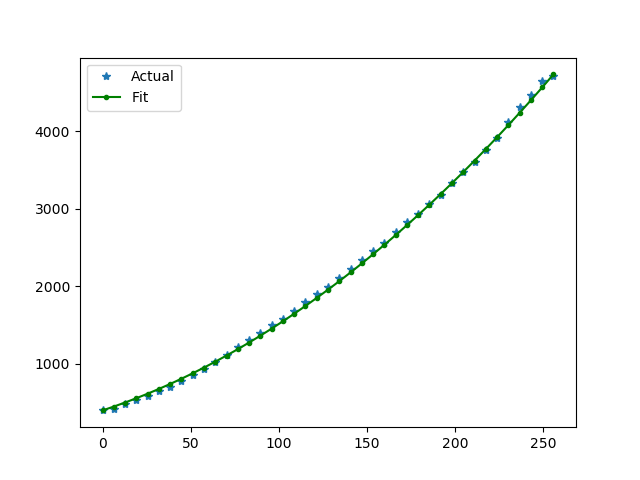

In [58]:
%matplotlib notebook
plt.plot(lum_values, avg_new, '*')
plt.plot(lum_values, pridectd, '.-g')
plt.legend(['Actual','Fit'])

## After applying the correction

In [59]:
basePath2 = os.path.join(folderPath, 'base7_00001.tif')
base2 = tifffile.imread(basePath2)

In [60]:
base2_avg = base2.mean(axis=(1,2))

In [61]:
base2_median = np.median(base2)
base2_median

-45.0

<IPython.core.display.Javascript object>


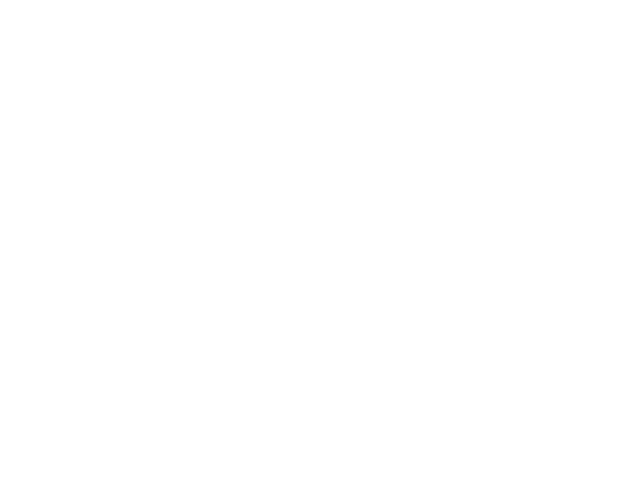

In [62]:
%matplotlib notebook
plt.plot(base2_avg)

In [81]:
calibPath2 = os.path.join(folderPath, 'Run10_RF_00001.tif')
calib2 = tifffile.imread(calibPath2)


In [82]:
calib2.shape

(574L, 512L, 512L)

In [83]:
calib2_avg = calib2.mean(axis=(1,2)) - base2_median

In [87]:
1.0/16000*512*2*1000


64.0

<IPython.core.display.Javascript object>


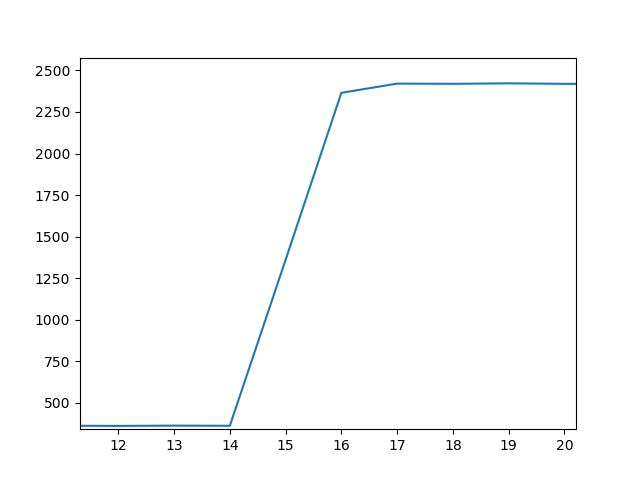

In [84]:
%matplotlib notebook
plt.plot(calib2_avg)

<IPython.core.display.Javascript object>


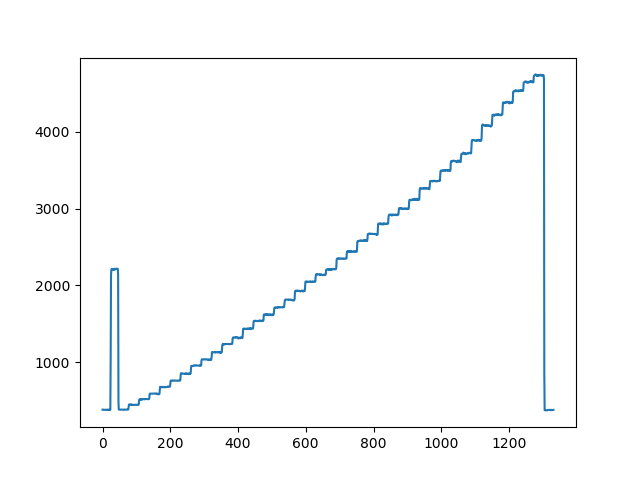

In [80]:
%matplotlib notebook
plt.plot(calib2_avg)

<IPython.core.display.Javascript object>


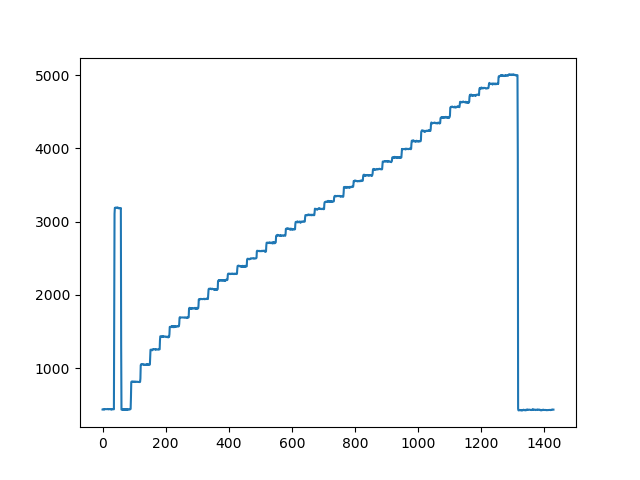

In [94]:
%matplotlib notebook
plt.plot(calib2_avg)